In [1]:
import nestpy
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:

#create detector
detector = nestpy.DetectorExample_LUX_RUN03()

# inspect detector parameters
# # feel free to inspect more
z_max = detector.get_TopDrift() 
radius = detector.get_radius() # right fid radius?? TBD
dt_min = detector.get_dt_min() # right min dt?? TBD
dt_max = detector.get_dt_max() # right max dt?? TBD
anode = detector.get_anode()
cathode = detector.get_cathode()
T_Kelvin = detector.get_T_Kelvin() 
p_bar = detector.get_p_bar() 

print('T_Kelvin:', T_Kelvin)
print('radius:', radius)
print('dt_min:', dt_min)
print('dt_max:', dt_max)
print('anode:', anode)
print('cathode:', cathode)
print('T_Kelvin:', T_Kelvin)
print('p_bar:', p_bar)

T_Kelvin: 173.0
radius: 200.0
dt_min: 80.0
dt_max: 130.0
anode: 549.2
cathode: 55.9
T_Kelvin: 173.0
p_bar: 1.57


In [3]:
# run a single recoil
keV=10
type_num = nestpy.INTERACTION_TYPE(0) # NR
pos_x, pos_y, pos_z = 0., 0., z_max/2.
inField=180

obs = nestpy.runNEST(detector, keV, type_num, inField, pos_x, pos_y, pos_z, seed=0)
s1c_phd = obs.s1c_phd
s2c_phd = obs.s2c_phd
print(s1c_phd, s2c_phd)

6.532790408546776 590.173217059425


In [5]:
# run many recoils with vectorized arguments

# somehow detector is deleted once runNEST is finished
# just declare it again here
detector = nestpy.DetectorExample_LUX_RUN03()

n_events=1000
keV=np.linspace(0, 100, n_events)
type_num = nestpy.INTERACTION_TYPE(0) # NR

r = np.random.uniform(low=0, high=radius, size=n_events)
phi = np.random.uniform(low=0, high=2*np.pi, size=n_events)
pos_x = r * np.cos(phi);
pos_y = r * np.sin(phi);
pos_z = np.random.uniform(low=0, high=z_max, size=n_events)

inField=180
obs_arr = nestpy.runNEST_vec(detector, keV.tolist(), type_num, inField, pos_x.tolist(), pos_y.tolist(), pos_z.tolist(), 0)
s1 = obs_arr.s1c_phd
s2 = obs_arr.s2c_phd


/Users/xinxiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


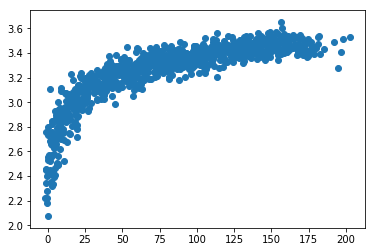

In [6]:
plt.scatter(s1, np.log10(s2))
plt.show()